In [160]:
import pandas as pd

In [161]:
df = pd.read_csv('https://raw.githubusercontent.com/ROCCYK/MachineLearning-Classification/main/FinalProject/heartdataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [163]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for class imbalance

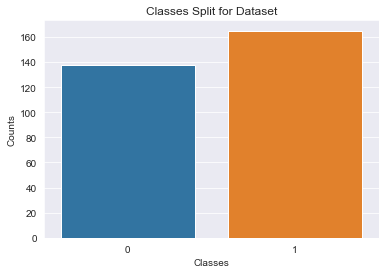

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='target').set(title='Classes Split for Dataset', xlabel='Classes',ylabel='Counts')
plt.show()

Checking for any NaN values

In [165]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Checking for duplicates

In [166]:
df.duplicated().sum()

1

Dropping duplicates

In [167]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [168]:
df_dummies = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df_dummies

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_dummies_scaled = sc.fit_transform(df_dummies[['age','trestbps', 'chol','thalach', 'oldpeak']])
df_dummies_scaled

array([[ 0.94979429,  0.76406571, -0.26128493,  0.01882584,  1.08402203],
       [-1.92854796, -0.09140084,  0.06774054,  1.63697881,  2.11892611],
       [-1.48572607, -0.09140084, -0.82256367,  0.98097085,  0.30784398],
       ...,
       [ 1.50332164,  0.70703461, -1.0354625 , -0.37477894,  2.0326841 ],
       [ 0.28556146, -0.09140084, -2.23543773, -1.51185941,  0.13535997],
       [ 0.28556146, -0.09140084, -0.20322161,  1.06843858, -0.8995441 ]])

In [170]:
df_dummies_scaled = pd.DataFrame(df_dummies_scaled, columns=['age','trestbps', 'chol','thalach', 'oldpeak'])
df_dummies_scaled

,age,trestbps,chol,thalach,oldpeak
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360
299,1.503322,0.707035,-1.035462,-0.374779,2.032684
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360


In [171]:
df_dummies = df_dummies.drop(columns=['age','trestbps', 'chol','thalach', 'oldpeak'])
df_dummies

,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0,1,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,1,1,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [172]:
df_dummies_scaled = pd.concat([df_dummies_scaled.reset_index(drop=True),df_dummies.reset_index(drop=True)], axis=1)
df_dummies_scaled

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,1.503322,0.707035,-1.035462,-0.374779,2.032684,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [173]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)

X_resample,y_resample = smote.fit_resample(df_dummies_scaled.drop(columns=['target']),df_dummies_scaled['target'])
df_resample = pd.concat([pd.DataFrame(y_resample), pd.DataFrame(X_resample)], axis=1)

C:\Users\Admin\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


1    164
0    164
Name: target, dtype: int64

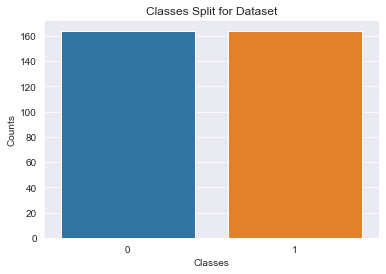

In [174]:
sns.countplot(data=df_resample, x='target').set(title='Classes Split for Dataset', xlabel='Classes',ylabel='Counts')
df_resample.target.value_counts()